In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix

In [ ]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Introduction:
This Dataset Contains Cars(samples), variables affect cars(features), and their price as a label

In [ ]:
for i,col in enumerate(df.columns):
  print(i+1,col)

1 car_ID
2 symboling
3 CarName
4 fueltype
5 aspiration
6 doornumber
7 carbody
8 drivewheel
9 enginelocation
10 wheelbase
11 carlength
12 carwidth
13 carheight
14 curbweight
15 enginetype
16 cylindernumber
17 enginesize
18 fuelsystem
19 boreratio
20 stroke
21 compressionratio
22 horsepower
23 peakrpm
24 citympg
25 highwaympg
26 price


In [ ]:
def  data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulss=[]
    dup=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        unique_val.append(np.array(data[col].value_counts().head(10).index))
        n_uniques.append(data[col].nunique())
        nulss.append(data[col].isnull().sum())
        dup.append(data.duplicated().sum())

    return pd.DataFrame({'Col':cols,'dtype':dtypes,'n_uniques':n_uniques,'n_nan':nulss,'unique_val':unique_val,'duplicated':dup})

In [ ]:
data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,car_ID,int64,205,0,"[1, 142, 132, 133, 134, 135, 136, 137, 138, 139]",0
1,symboling,int64,6,0,"[0, 1, 2, 3, -1, -2]",0
2,CarName,object,147,0,"[toyota corona, toyota corolla, peugeot 504, s...",0
3,fueltype,object,2,0,"[gas, diesel]",0
4,aspiration,object,2,0,"[std, turbo]",0
5,doornumber,object,2,0,"[four, two]",0
6,carbody,object,5,0,"[sedan, hatchback, wagon, hardtop, convertible]",0
7,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
8,enginelocation,object,2,0,"[front, rear]",0
9,wheelbase,float64,53,0,"[94.5, 93.7, 95.7, 96.5, 97.3, 98.4, 104.3, 10...",0


Data contains 205 samples none of them are nan

In [ ]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
Categorical_Features =["symboling","carName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]

Count Plot for categorical features

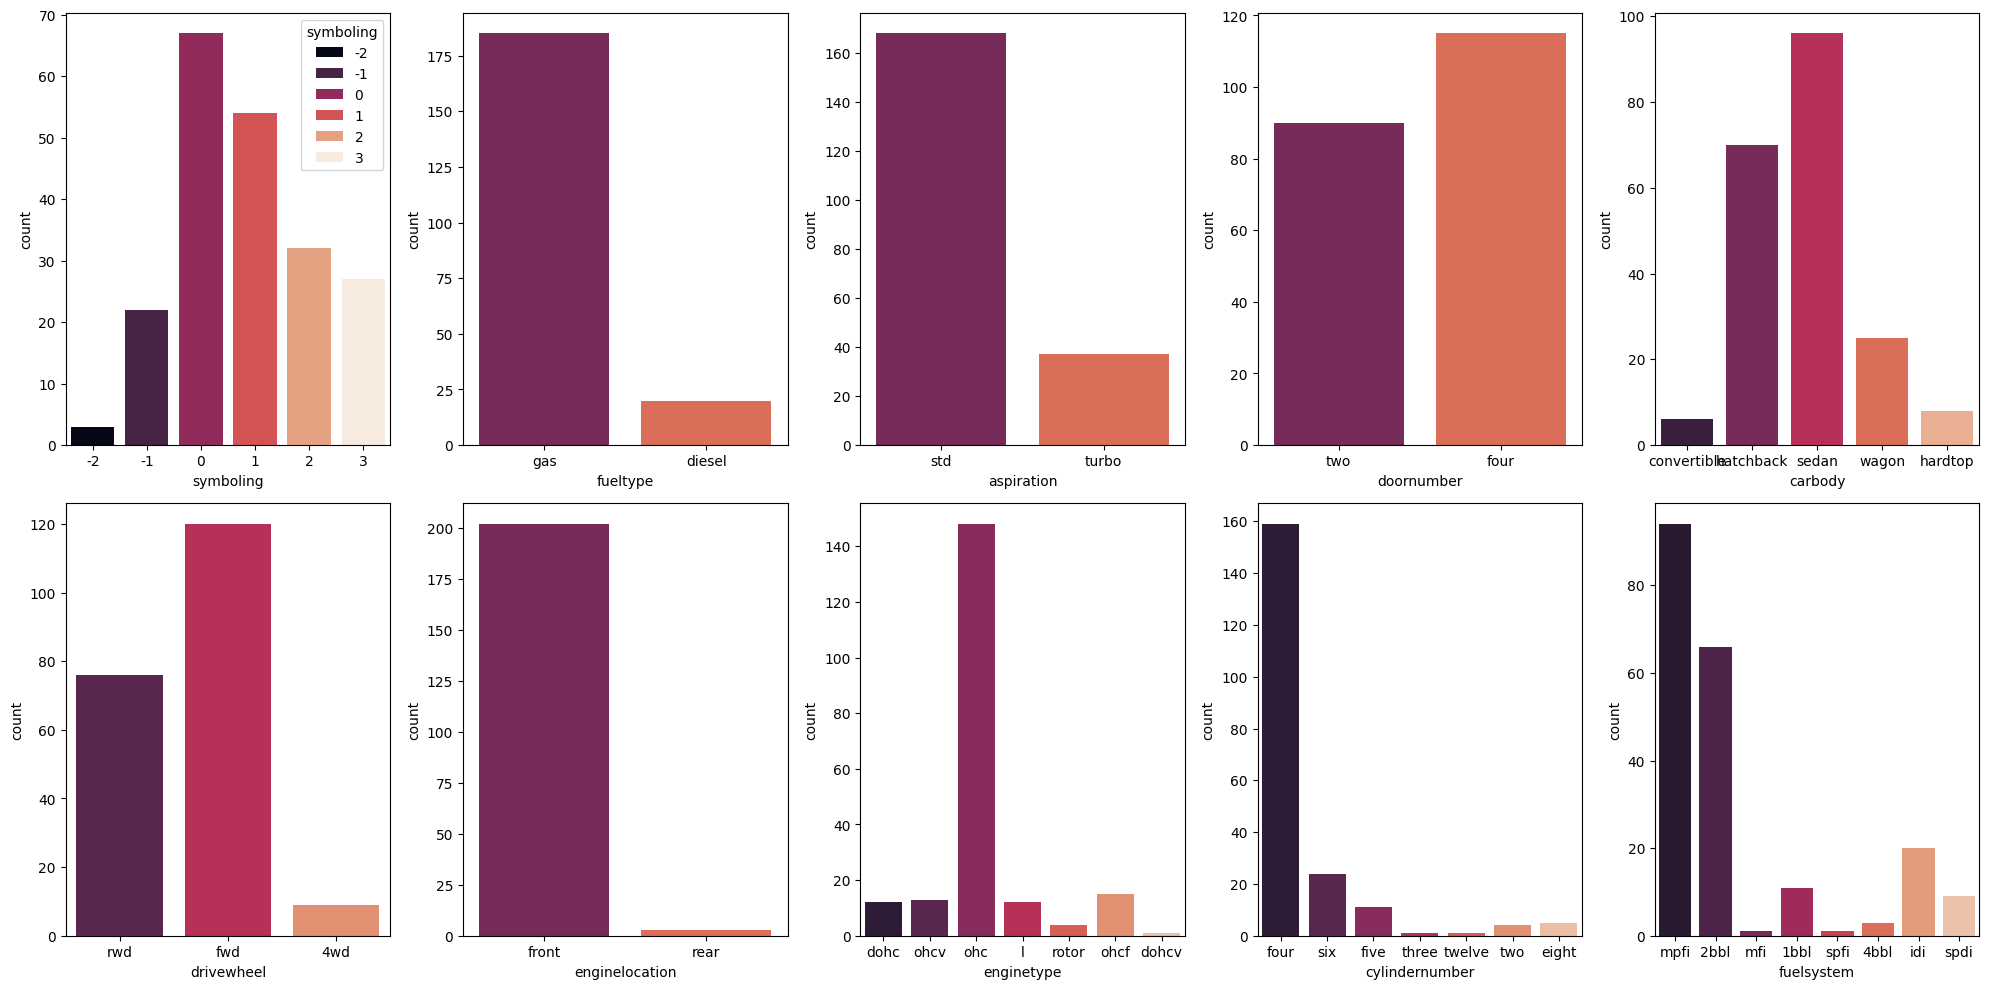

In [ ]:
Categorical_Features.remove("carName")
plt.figure(figsize=(20, 10))
for i in range(len(Categorical_Features)):
        plt.subplot(2, 5, i + 1)
        sns.countplot(x=df[Categorical_Features[i]], palette="rocket", hue=df[Categorical_Features[i]])


plt.tight_layout()
plt.show()
Categorical_Features.append("carName")

Hist Plot for all numerical data but not plotting car.ID


In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns=numeric_columns.drop(["car_ID","symboling"],axis=1)


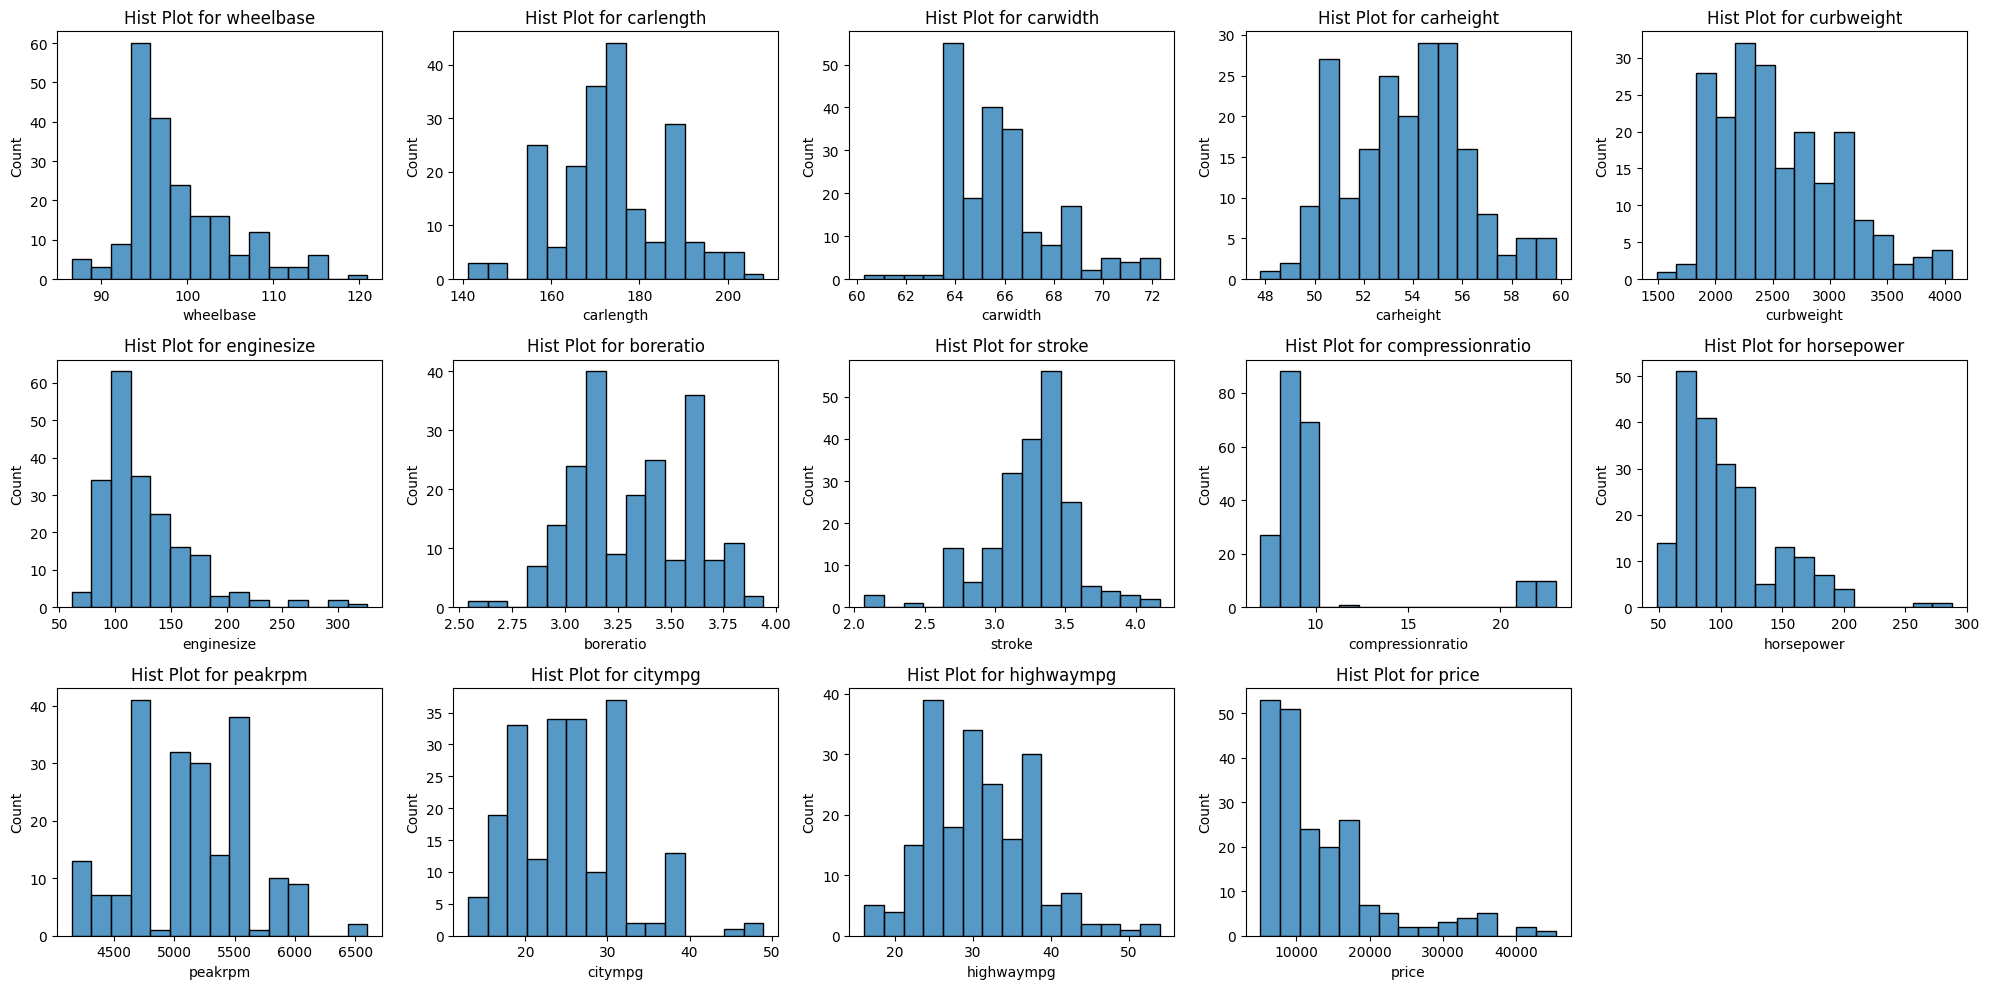

In [ ]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3,5,i+1)
    sns.histplot(x=numeric_columns[column],bins=15)
    plt.title(f"Hist Plot for {column}")

plt.tight_layout()
plt.show()

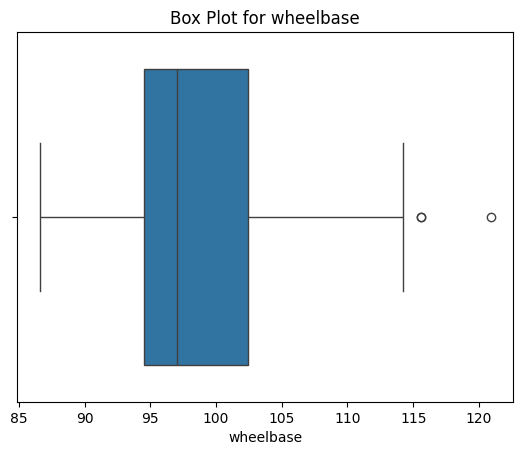

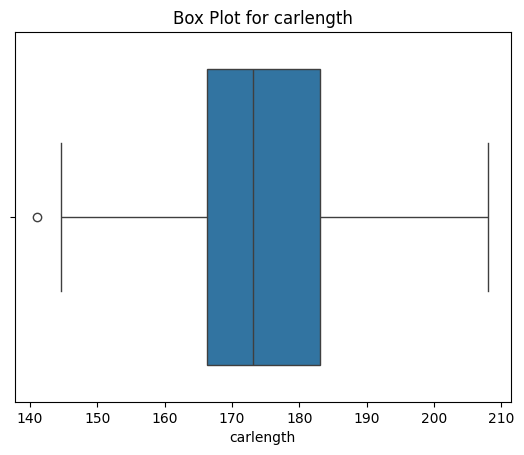

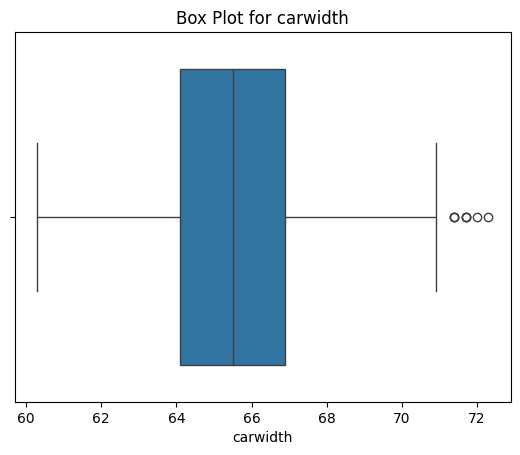

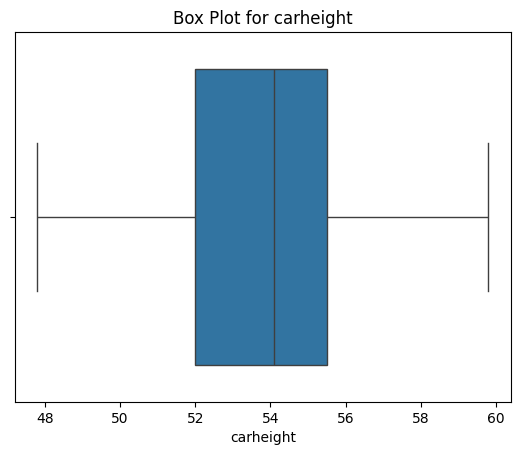

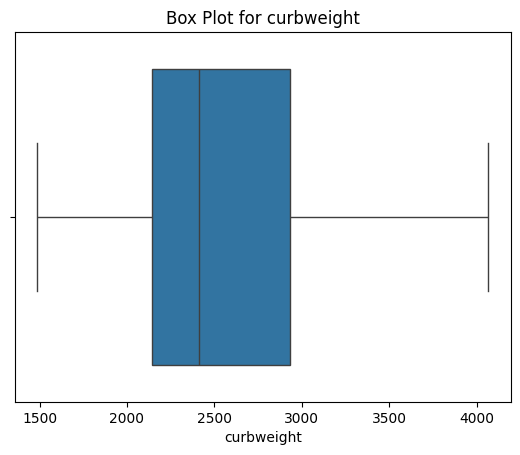

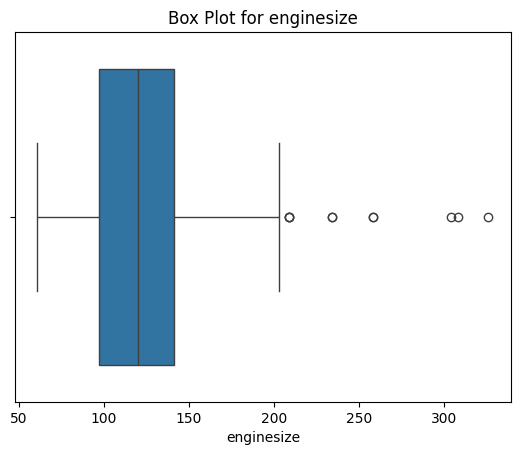

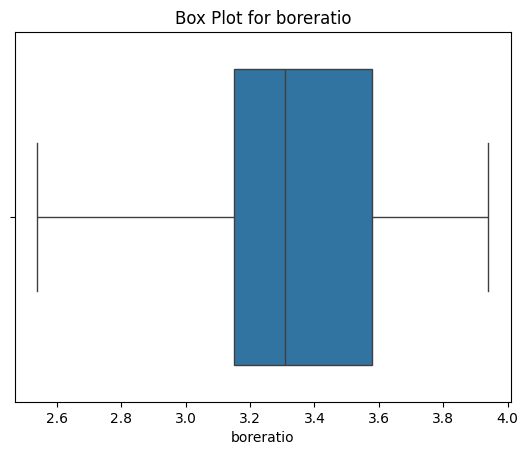

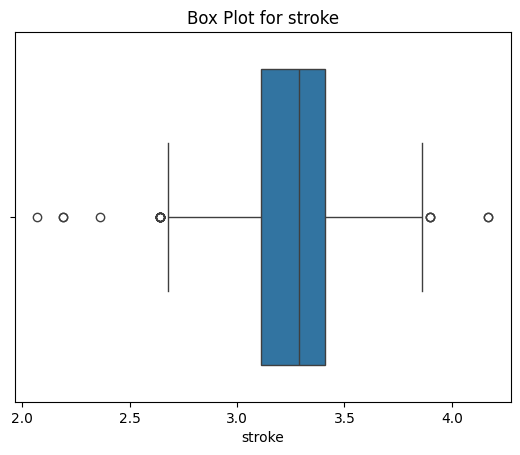

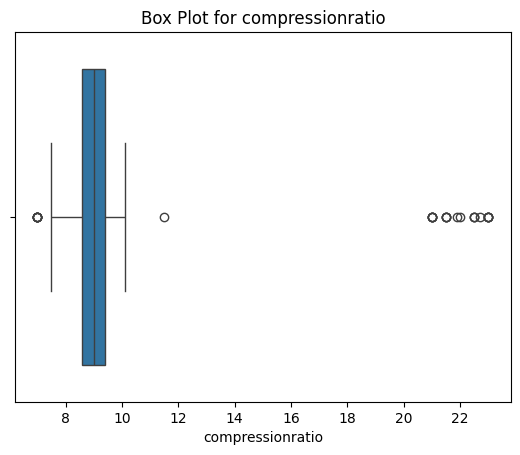

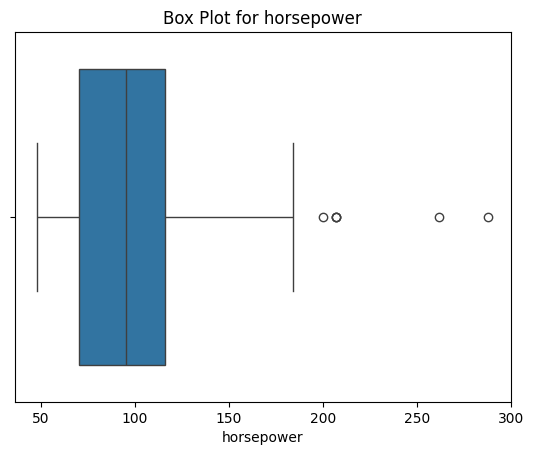

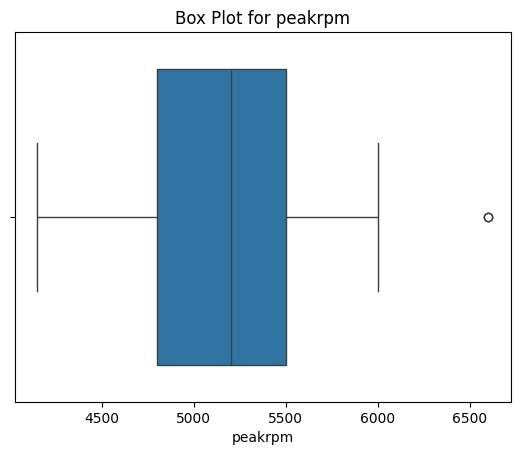

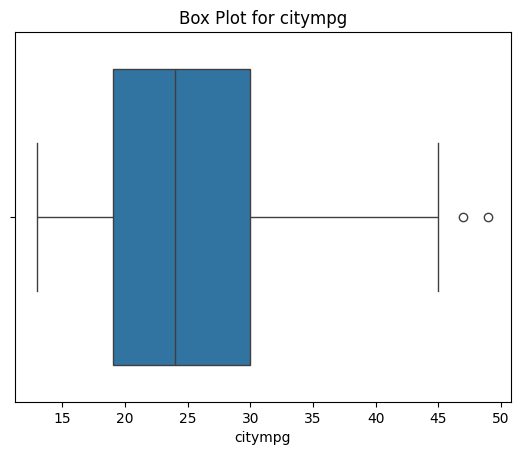

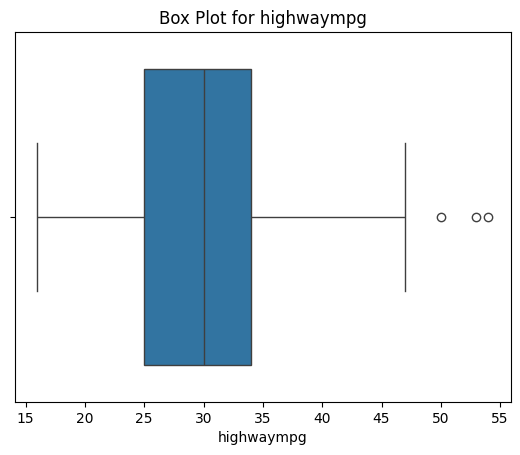

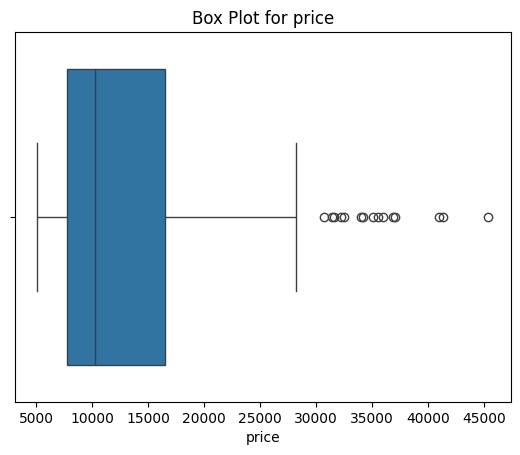

In [ ]:
for column in numeric_columns.columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"Box Plot for {column}")
  plt.show()

Box Plot for numerical features, visualizing that the compression ratio and prices having outliers

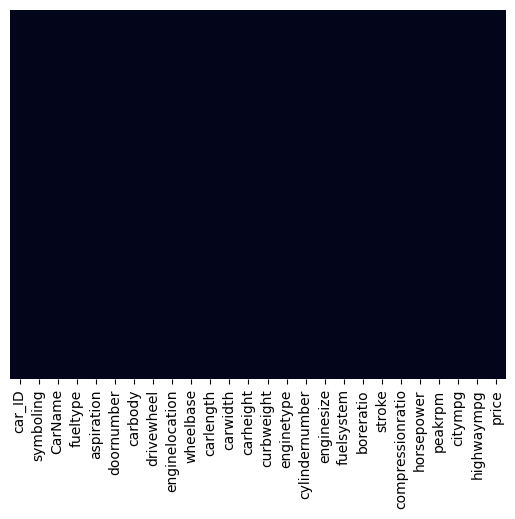

In [ ]:
sns.heatmap(df.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

Data has no missing values


<Axes: >

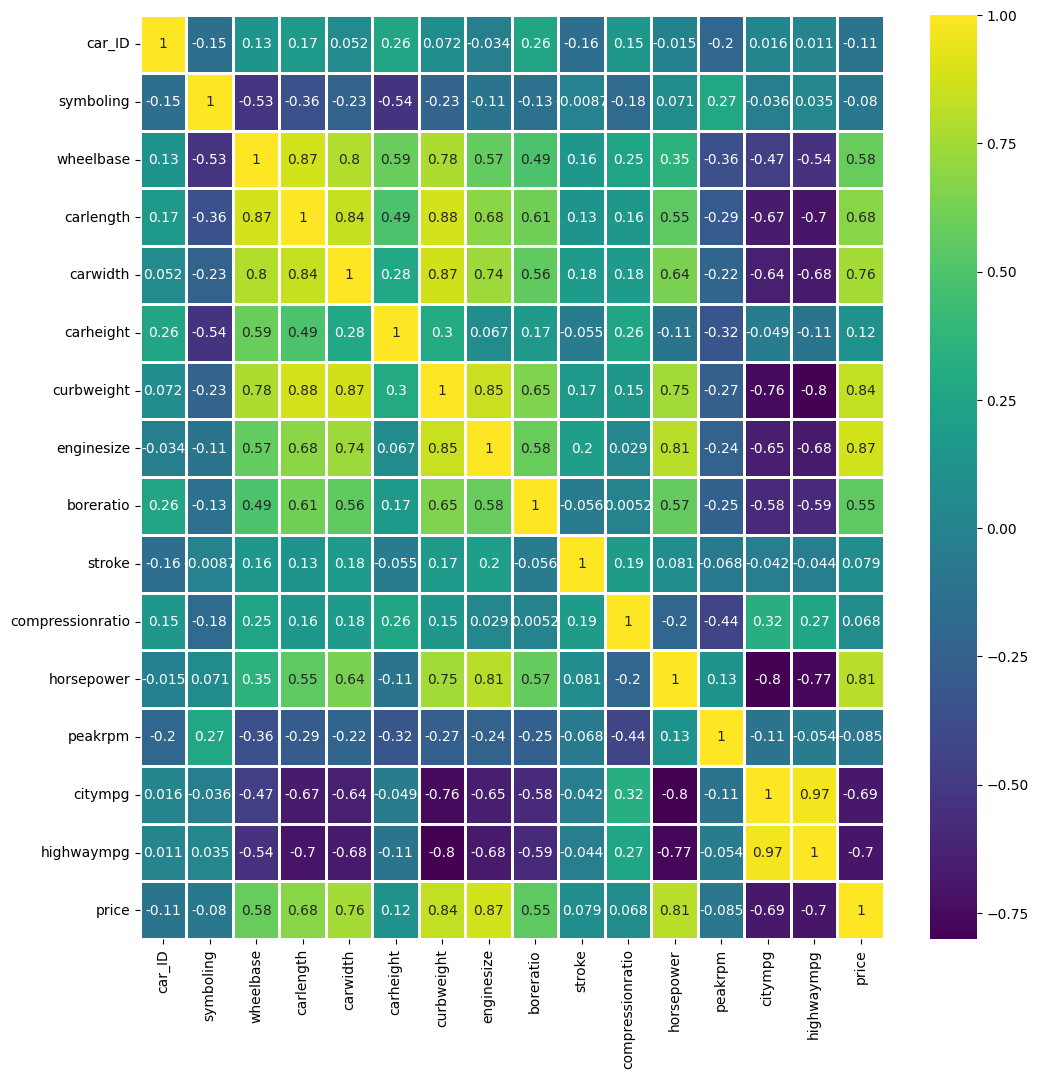

In [ ]:
plt.figure(figsize=(12,12))
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,linewidths=2,cmap="viridis")

High Correlation between citympg and highwaympg (this may cause to future drop of any of the 2 columns)

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No missing values in dataframe to fill with mean, mode or median

In [ ]:
df.duplicated().sum()

0

No duplicates in dataframe but may change when we drop column of car_ID because it's unique for every entry

In [ ]:
df = df.drop("car_ID",axis=1)
df.duplicated().sum()

0

Also no duplicates

We'll start to remove the outliers

In [ ]:
def remove_outliers_iqr(data, columns):
    for col in numeric_columns:
        if col !="price":
              q1 = data[col].quantile(0.25)
              q3 = data[col].quantile(0.75)
              iqr = q3 - q1
              lower_whisker = q1 - 1.5 * iqr
              upper_whisker = q3 + 1.5 * iqr
              filt =  (data[col] < lower_whisker) | (data[col] > upper_whisker)
              data=data.drop(data[filt].index, axis=0)
    data.reset_index(drop=True,inplace=True)
    return data

In [ ]:
df=remove_outliers_iqr(df,df.columns)

80 outliers were removed from the dataset, now having 125 samples, we'll draw boxplot again

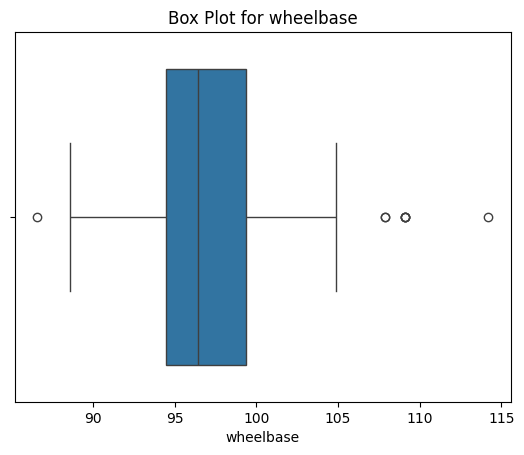

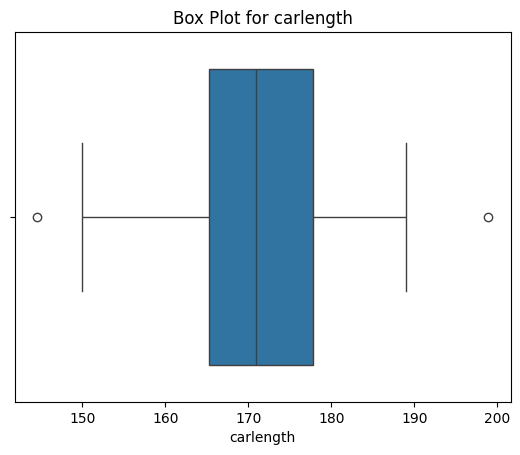

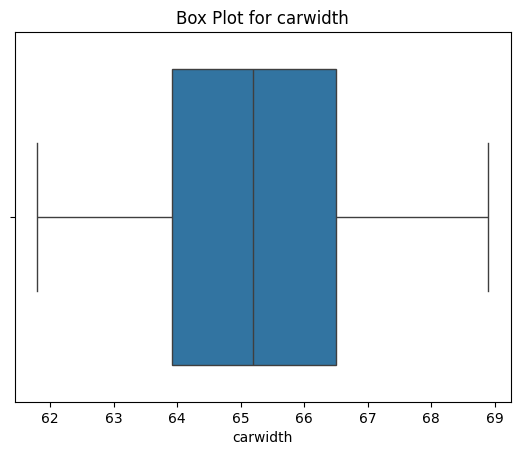

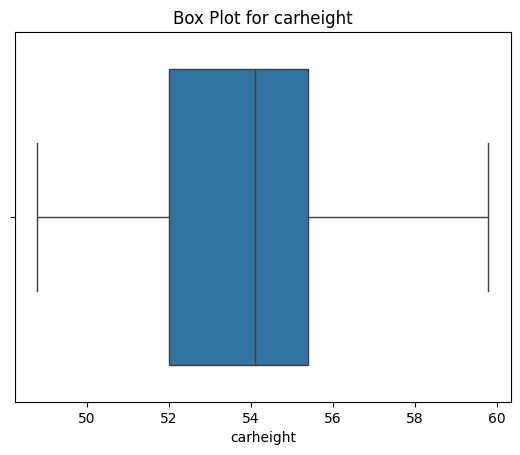

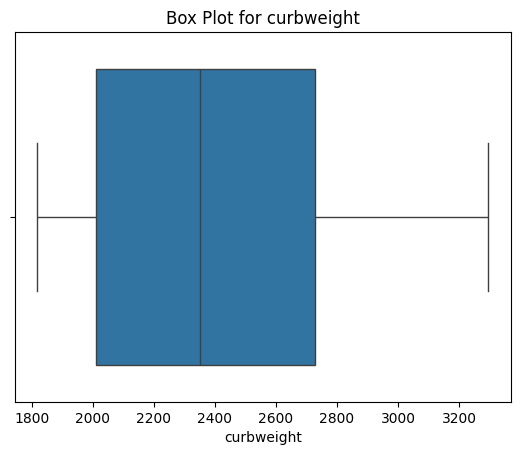

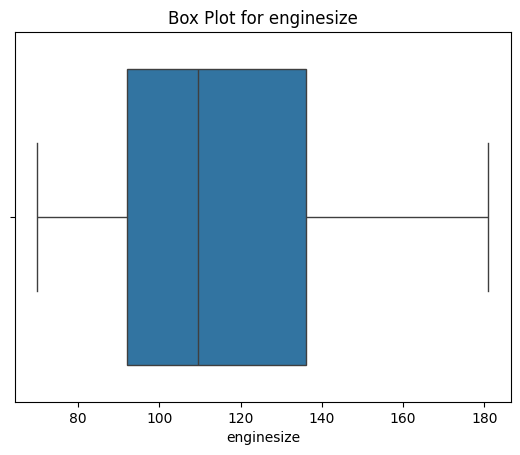

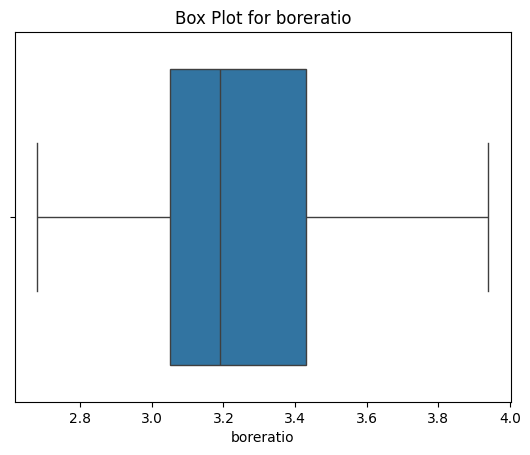

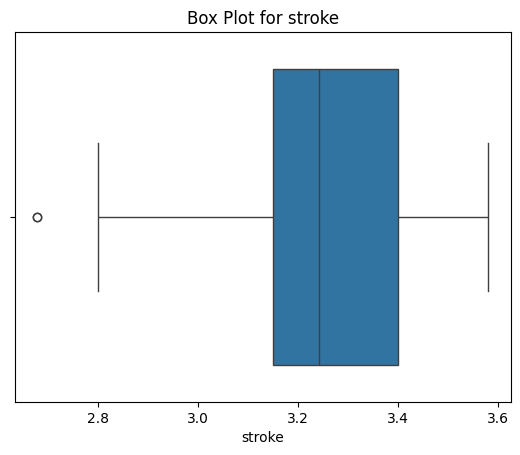

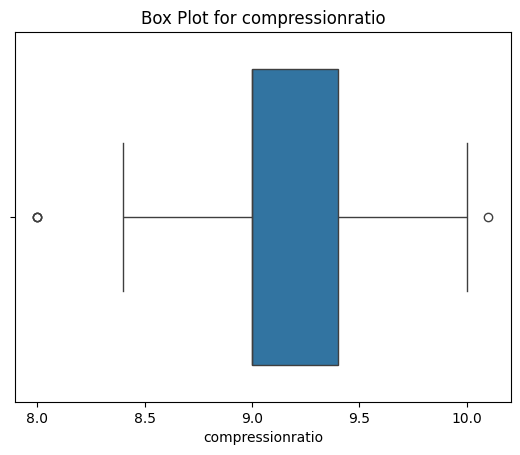

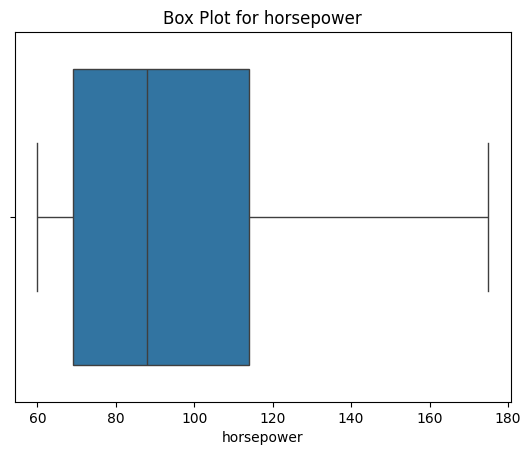

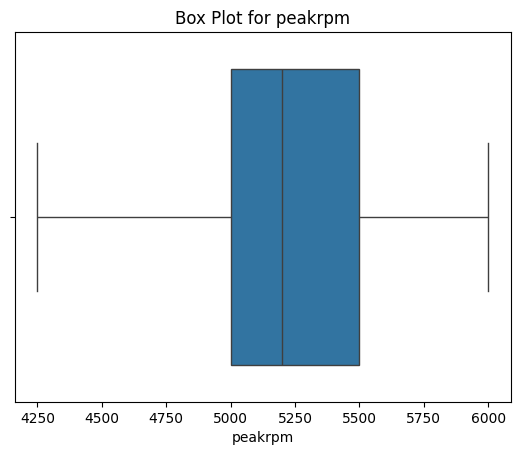

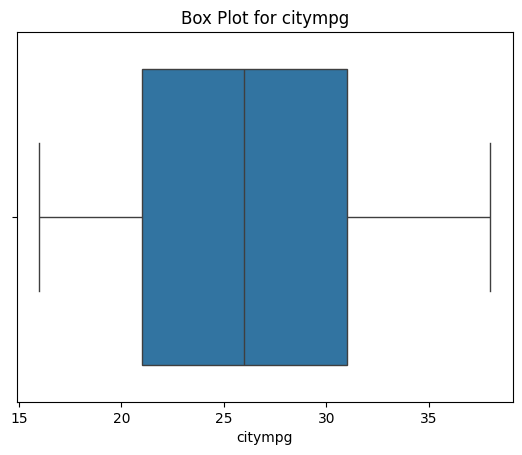

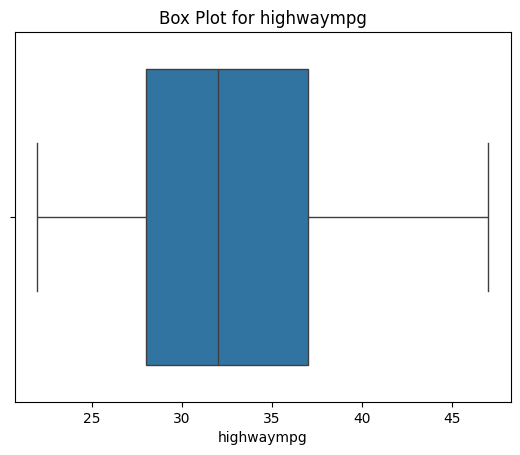

In [ ]:
col = list(numeric_columns.columns)
for i in numeric_columns.columns:
  if i !="price":
    sns.boxplot(x=df[i])
    plt.title(f"Box Plot for {i}")
    plt.show()

drop citympg column as it has very high correlation between it and highwaympg

In [ ]:
df=df.drop("citympg",axis=1)

drop carName column

In [ ]:
df=df.drop("CarName",axis=1)

In [ ]:
df.skew(numeric_only=True).sort_values(ascending=False)

wheelbase           1.015226
horsepower          0.941844
price               0.871818
enginesize          0.773884
carwidth            0.591371
boreratio           0.495759
curbweight          0.406308
carheight           0.229522
highwaympg          0.184342
peakrpm             0.059857
symboling           0.036452
carlength           0.017365
compressionratio   -0.441327
stroke             -0.468941
dtype: float64

5 right skewed columns (log transformation)

In [ ]:
skewed = df.skew(numeric_only=True).sort_values(ascending=False)[:5]
skewed

wheelbase     1.015226
horsepower    0.941844
price         0.871818
enginesize    0.773884
carwidth      0.591371
dtype: float64

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
def logTrans(data,features):
    numeric_features = data.select_dtypes(include=[np.number]).columns
    for feature in features:
        logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {feature} before Transformation", fontsize=15)
        sns.histplot(data[feature], kde=True, color="red")
        plt.subplot(1,2,2)

        df_log = pd.DataFrame(logTr.fit_transform(data))
        plt.title(f"Distribution of {feature} after Transformation", fontsize=15)
        sns.histplot(df_log,bins=20, kde=True , legend=False)
        plt.xlabel(feature)
        plt.show()
        print(f"Skewness was {round(data[feature].skew(),5)} before & is {round(df_log[0].skew(),5)} after Log transformation.")
        data[feature] = df_log[0]
    return data

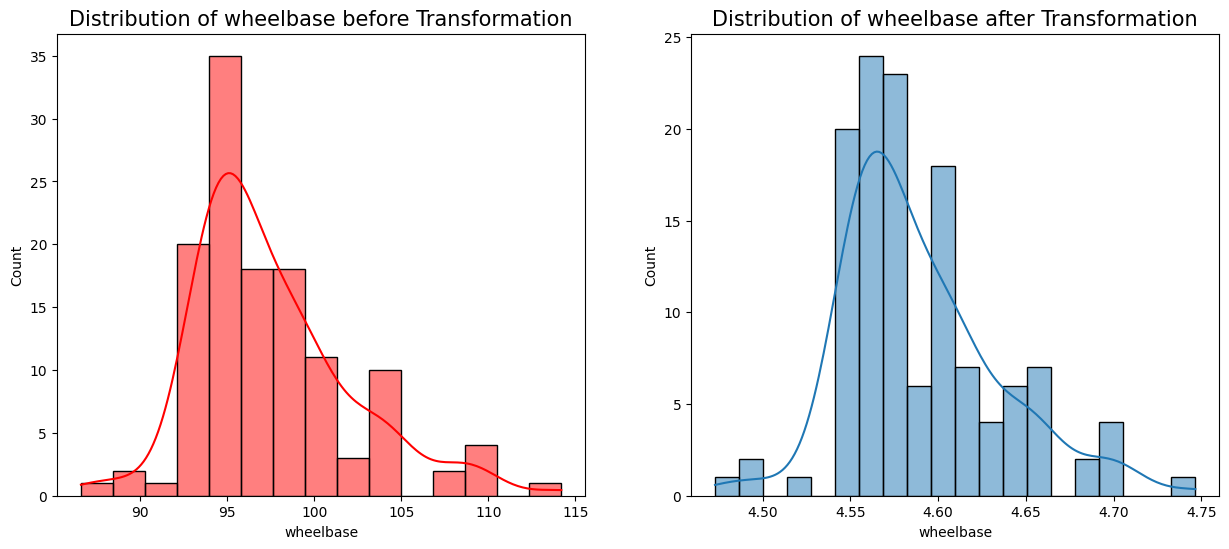

Skewness was 1.01523 before & is 0.85448 after Log transformation.


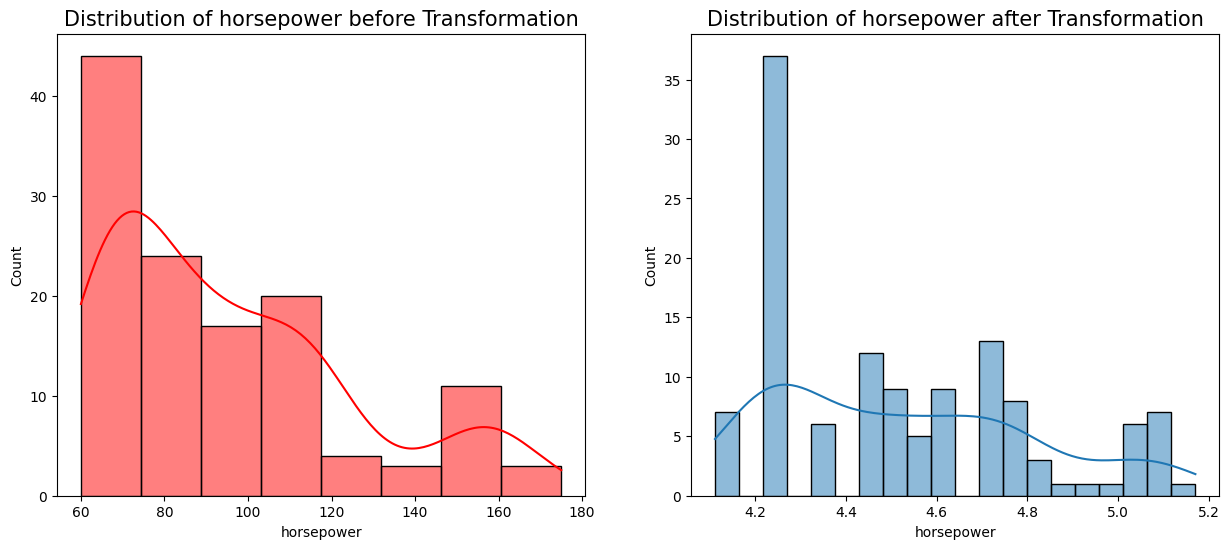

Skewness was 0.94184 before & is 0.52278 after Log transformation.


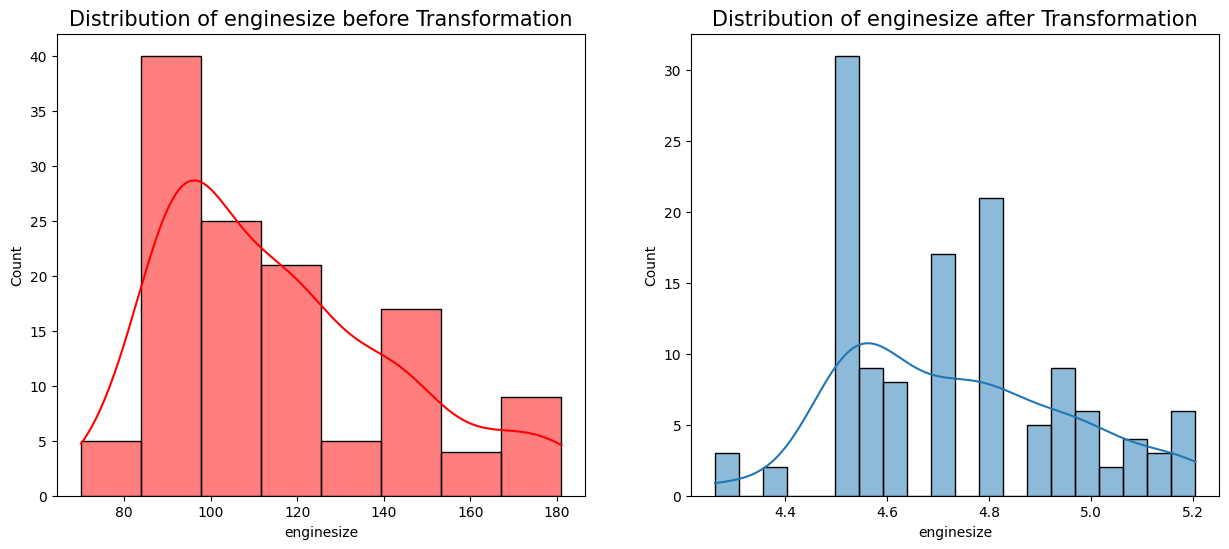

Skewness was 0.77388 before & is 0.36213 after Log transformation.


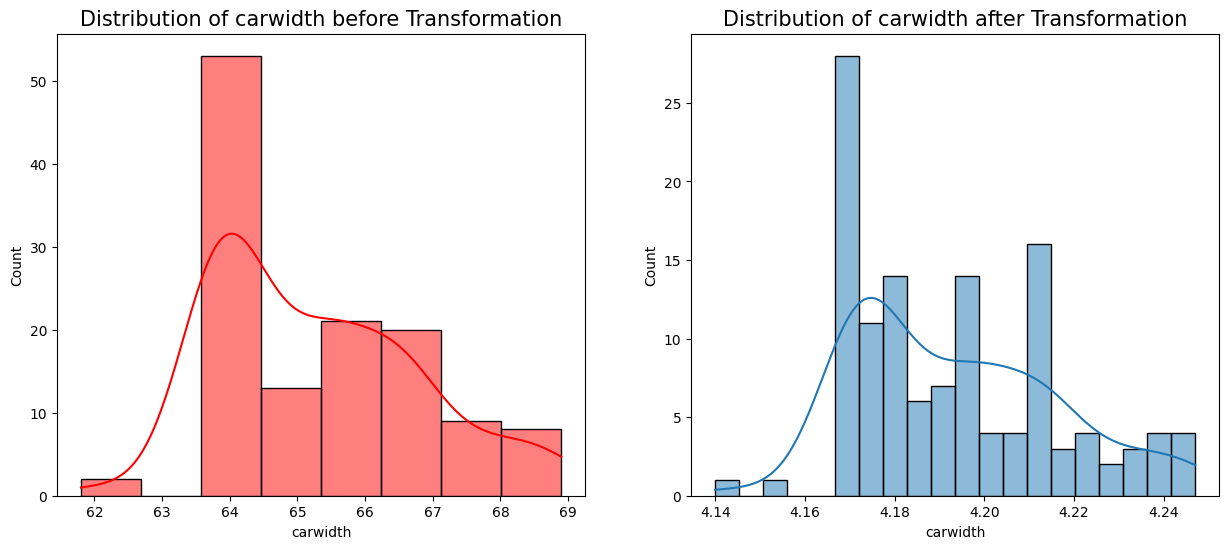

Skewness was 0.59137 before & is 0.54739 after Log transformation.


In [ ]:
df=logTrans(df,features=["wheelbase","horsepower","enginesize","carwidth"])

In [ ]:
df.duplicated().sum()

1

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Next Step is Encoding (we'll do one hot encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
print(Categorical_Features)


['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'carName']


In [ ]:
Categorical_Features.remove("carName")
info_cat = df[Categorical_Features]
info_cat.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [ ]:
ohe=OneHotEncoder()
info_cat_1hot=ohe.fit_transform(info_cat)

In [ ]:
info_cat_1hot_df = pd.DataFrame(info_cat_1hot.toarray(), columns=ohe.get_feature_names_out())
info_cat_1hot_df

,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_copy = df.merge(info_cat_1hot_df,left_index=True, right_index=True)


In [ ]:
df_copy=df_copy.drop(Categorical_Features,axis=1)

In [ ]:
pd.options.display.max_columns = None
df_copy

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi
0,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.680,9.00,4.718499,5000,27,13495.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.680,9.00,4.718499,5000,27,16500.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.470,9.00,5.043425,5000,26,16500.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.400,10.00,4.634729,5500,30,13950.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.400,8.00,4.753590,5500,22,17450.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,4.613138,177.3,4.209160,53.1,2507,4.919981,3.19,3.400,8.50,4.709530,5500,25,15250.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,4.626932,176.8,4.186620,54.3,2395,4.691348,3.50,2.800,8.80,4.624973,5800,29,16430.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,4.626932,176.8,4.186620,54.3,2395,4.691348,3.50,2.800,8.80,4.624973,5800,29,16925.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,4.626932,176.8,4.186620,54.3,2710,5.105945,3.31,3.190,9.00,4.804021,4250,28,20970.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,4.626932,176.8,4.186620,54.3,2765,5.105945,3.31,3.190,9.00,4.804021,4250,28,21105.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_copy_cols = list(df_copy.columns)
for i in info_cat_1hot_df.columns:
  df_copy_cols.remove(i)
df_copy_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'price']

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
df_copy

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi
0,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.680,9.00,4.718499,5000,27,13495.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.680,9.00,4.718499,5000,27,16500.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.470,9.00,5.043425,5000,26,16500.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.400,10.00,4.634729,5500,30,13950.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.400,8.00,4.753590,5500,22,17450.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,4.613138,177.3,4.209160,53.1,2507,4.919981,3.19,3.400,8.50,4.709530,5500,25,15250.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,4.626932,176.8,4.186620,54.3,2395,4.691348,3.50,2.800,8.80,4.624973,5800,29,16430.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,4.626932,176.8,4.186620,54.3,2395,4.691348,3.50,2.800,8.80,4.624973,5800,29,16925.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,4.626932,176.8,4.186620,54.3,2710,5.105945,3.31,3.190,9.00,4.804021,4250,28,20970.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,4.626932,176.8,4.186620,54.3,2765,5.105945,3.31,3.190,9.00,4.804021,4250,28,21105.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
scaler = StandardScaler()
num_scaled=scaler.fit_transform(df_copy[df_copy_cols])
scaled_df=pd.DataFrame(num_scaled,columns=df_copy_cols)
scaled_df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,-2.124481,-0.254244,-0.769340,-2.020135,0.351020,0.622795,0.823181,-3.104451,-0.195630,0.669898,-0.615329,-0.837501,0.583893
1,-2.124481,-0.254244,-0.769340,-2.020135,0.351020,0.622795,0.823181,-3.104451,-0.195630,0.669898,-0.615329,-0.837501,1.257204
2,-0.677726,-0.026823,0.175922,-0.525871,1.025564,1.319321,-2.386963,1.184858,-0.195630,1.809296,-0.615329,-1.012628,1.257204
3,0.547634,0.484874,0.641117,0.262768,-0.166539,-0.161116,-0.314591,0.804793,2.379543,0.376148,0.688958,-0.312121,0.685842
4,0.457428,0.484874,0.773140,0.262768,1.028017,0.823728,-0.314591,0.804793,-2.770804,0.792951,0.688958,-1.713135,1.470064
5,0.547634,0.551205,0.707177,-0.235320,0.250452,0.823728,-0.314591,0.804793,-1.483217,0.638448,0.688958,-1.187755,0.977125
6,0.860560,0.503826,-0.294195,0.262768,-0.024272,-0.202091,0.945085,-2.452910,-0.710665,0.341936,1.471531,-0.487248,1.241520
7,0.860560,0.503826,-0.294195,0.262768,-0.024272,-0.202091,0.945085,-2.452910,-0.710665,0.341936,1.471531,-0.487248,1.352431
8,0.860560,0.503826,-0.294195,0.262768,0.748388,1.658105,0.173025,-0.335403,-0.195630,0.969793,-2.571760,-0.662375,2.258768
9,0.860560,0.503826,-0.294195,0.262768,0.883296,1.658105,0.173025,-0.335403,-0.195630,0.969793,-2.571760,-0.662375,2.289017
